In [151]:
import pandas as pd
import numpy as np
import sklearn as skl
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import matplotlib.pyplot as plt

In [129]:
#EDA
df = pd.read_csv("house_prices.csv")
#print(df.groupby('facing'))
#df.info()
cols = ['Status','Index','Title','Description','overlooking', 'facing','Society','Dimensions','Plot Area','Floor','Carpet Area','location','Ownership','Super Area','Car Parking','Transaction']
df = df.drop(columns=cols)
df= df.drop(columns = ['Furnishing'])
df.head(10)


,Amount(in rupees),Price (in rupees),Bathroom,Balcony
0,42 Lac,6000.0,1,2
1,98 Lac,13799.0,2,NaN
2,1.40 Cr,17500.0,2,NaN
3,25 Lac,NaN,1,1
4,1.60 Cr,18824.0,2,NaN
5,45 Lac,6618.0,1,1
6,16.5 Lac,2538.0,1,NaN
7,60 Lac,10435.0,1,NaN
8,60 Lac,10000.0,1,NaN
9,1.60 Cr,11150.0,3,1


In [130]:
df["Amount(in rupees)"] = df["Amount(in rupees)"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Amount(in rupees)"] = df["Amount(in rupees)"].astype(float)
df["Amount(in rupees)"] = df["Amount(in rupees)"].fillna(df["Amount(in rupees)"].mean())

In [131]:

df["Price (in rupees)"] = df["Price (in rupees)"].astype(float)
df["Price (in rupees)"] = df["Price (in rupees)"].fillna(df["Price (in rupees)"].mean())


In [132]:
df["Balcony"] = df["Balcony"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Balcony"] = df["Balcony"].astype(float)
df["Balcony"] = df["Balcony"].fillna(df["Balcony"].mean())


In [133]:
df["Bathroom"] = df["Bathroom"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Bathroom"] = df["Bathroom"].astype(float)
df["Bathroom"] = df["Bathroom"].fillna(df["Bathroom"].mean())

In [143]:
scaler = MinMaxScaler()
df[["Amount(in rupees)"]] = scaler.fit_transform(df[["Amount(in rupees)"]])

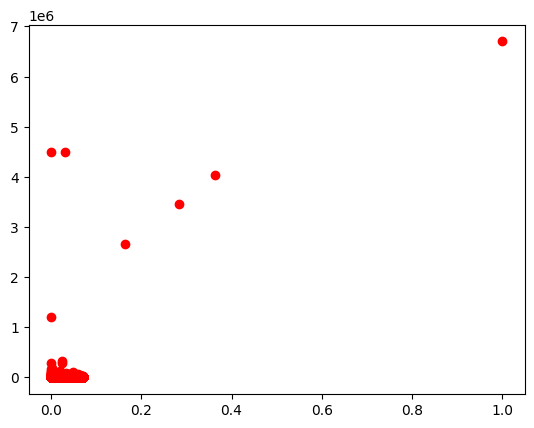

In [144]:
amt = df[["Amount(in rupees)"]]
y = df["Price (in rupees)"]
plt.scatter(amt,y,color='red')

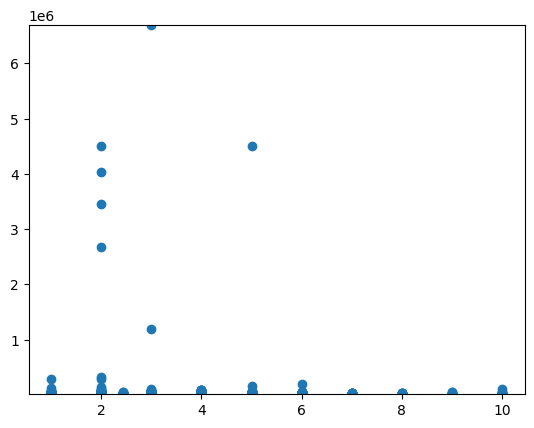

In [147]:
bathroom = df["Bathroom"]
plt.ylim(10000,df["Price (in rupees)"].max())
plt.scatter(bathroom,y)

In [153]:
model = LinearRegression()
X = df[["Bathroom","Balcony","Amount(in rupees)"]]
y = df["Price (in rupees)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [154]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


MSE: 454032530.6901217
R²: 0.002990439853021609
